In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = 'Data'
columns = ['Center', 'Left', 'Right', 'Steering', 'Throttle', 'Brake', 'Speed']
data = pd.read_csv(os.path.join(path, 'driving_log.csv'), names=columns)
data.head()

,Center,Left,Right,Steering,Throttle,Brake,Speed
0,D:\Udacity selfDrivingCar simulator\IMG\center...,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000044
1,D:\Udacity selfDrivingCar simulator\IMG\center...,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000042
2,D:\Udacity selfDrivingCar simulator\IMG\center...,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000038
3,D:\Udacity selfDrivingCar simulator\IMG\center...,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000051
4,D:\Udacity selfDrivingCar simulator\IMG\center...,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000059


In [3]:
data.shape

(3815, 7)

In [4]:
# take only 'image file name of Center'
def getName(filePath):
    return filePath.split('\\')[-1]
    
data['Center'] = data['Center'].apply(getName)
data.head()

,Center,Left,Right,Steering,Throttle,Brake,Speed
0,center_2022_05_24_15_55_06_287.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000044
1,center_2022_05_24_15_55_06_396.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000042
2,center_2022_05_24_15_55_06_501.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000038
3,center_2022_05_24_15_55_06_605.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000051
4,center_2022_05_24_15_55_06_709.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.0,0.0,0.0,0.000059


In [5]:
data['Steering'].value_counts()  # 0 means going straight

 0.000000    2137
-1.000000      70
 1.000000      67
 0.017499       1
-0.298117       1
             ... 
 0.421745       1
-0.621287       1
-0.365945       1
-0.349677       1
-0.616109       1
Name: Steering, Length: 1544, dtype: int64

In [6]:
# show the 'center camera image' and 'Steering wheeling angle'
import cv2

img_dir = 'Data/IMG'
def show_img(idx):
    img_path = os.path.join(img_dir + "/" + data['Center'][idx])
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.xlabel(data['Steering'][idx])

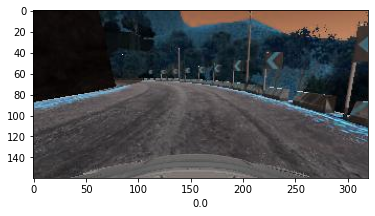

In [7]:
show_img(0) # straight

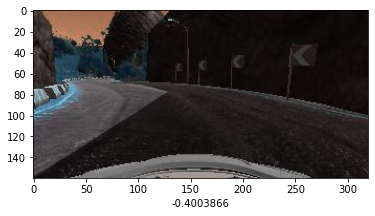

In [8]:
show_img(700) # left 

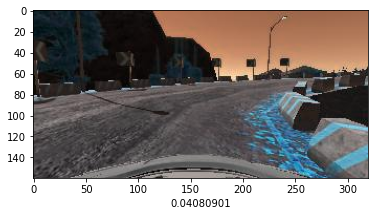

In [9]:
show_img(3000) # right 

In [10]:
# visualize data
n_bins = 31
hist, bins = np.histogram(data['Steering'], n_bins)
bins # edges of bins

array([-1.        , -0.93548387, -0.87096774, -0.80645161, -0.74193548,
       -0.67741935, -0.61290323, -0.5483871 , -0.48387097, -0.41935484,
       -0.35483871, -0.29032258, -0.22580645, -0.16129032, -0.09677419,
       -0.03225806,  0.03225806,  0.09677419,  0.16129032,  0.22580645,
        0.29032258,  0.35483871,  0.41935484,  0.48387097,  0.5483871 ,
        0.61290323,  0.67741935,  0.74193548,  0.80645161,  0.87096774,
        0.93548387,  1.        ])

In [11]:
hist # freq

array([  80,   15,    6,   13,   32,   46,   36,   23,   40,   82,  144,
         60,   44,   64,   94, 2223,   99,   79,   49,   64,  107,   93,
         49,   36,   43,   38,   30,   14,   10,   22,   80], dtype=int64)

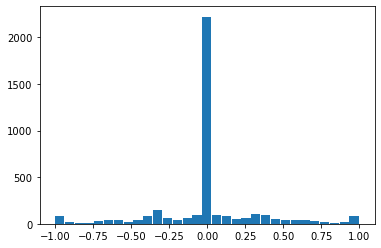

In [12]:
plt.hist(data['Steering'], n_bins,  width=0.06)
plt.show()

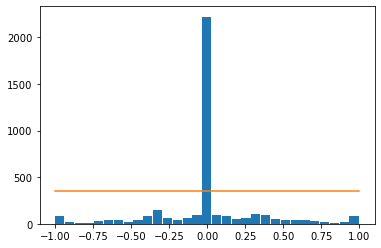

In [13]:
samples_per_bins = 350

plt.hist(data['Steering'], n_bins,  width=0.06)
plt.plot((-1, 1), (samples_per_bins, samples_per_bins))
plt.show()

In [14]:
#len(data['Steering'])

In [15]:
# remove some data where Steering wheel angle is equal to 0
from sklearn.utils import shuffle

indexToBeRemoved = []
for j in range(n_bins):
    binDataIndex = []
    for i in range(len(data['Steering'])):
        if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j+1]:
            binDataIndex.append(i)
    binDataIndex = shuffle(binDataIndex)
    binDataIndex = binDataIndex[samples_per_bins:] # indeces to be removed
    indexToBeRemoved.extend(binDataIndex)

In [16]:
df = data.drop(data.index[indexToBeRemoved])
df.head()

,Center,Left,Right,Steering,Throttle,Brake,Speed
6,center_2022_05_24_15_55_06_916.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.000000,0.0,0.0,0.000074
7,center_2022_05_24_15_55_07_018.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.000000,0.0,0.0,0.000040
8,center_2022_05_24_15_55_07_121.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.000000,0.0,0.0,0.000038
16,center_2022_05_24_15_55_07_962.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,0.000000,1.0,0.0,3.510267
25,center_2022_05_24_15_55_08_928.jpg,D:\Udacity selfDrivingCar simulator\IMG\left_...,D:\Udacity selfDrivingCar simulator\IMG\right...,-0.313841,1.0,0.0,14.553590


In [17]:
print('removed images :' ,len(indexToBeRemoved))
print('left images :' ,df.shape[0])

removed images : 1873
left images : 1942


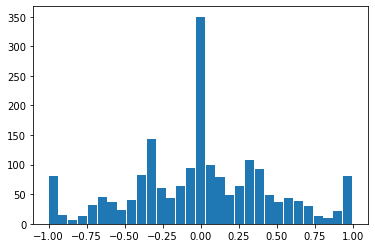

In [18]:
plt.hist(df['Steering'], n_bins,  width=0.06)
plt.show()

In [19]:
df['Steering'].value_counts()

 0.000000    337
-1.000000     70
 1.000000     67
-0.365945      1
 0.406497      1
            ... 
-0.917685      1
 0.077035      1
-0.676237      1
 0.318970      1
-0.273772      1
Name: Steering, Length: 1471, dtype: int64

In [20]:
# create numpy arrays for 'image path' and 'steering' 
img_paths = []
steerings =[]

for i in range(len(df)):
    indexed_data = df.iloc[i]
    img_paths.append(os.path.join(img_dir + "/" + indexed_data['Center']))
    steerings.append(float(indexed_data['Steering']))

# np arrays
img_paths = np.asarray(img_paths)
steerings = np.asarray(steerings)

In [21]:
#!pip install imgaug

In [22]:
from sklearn.model_selection import train_test_split

import matplotlib.image as img # returns RGB
from imgaug import augmenters as iaa

In [23]:
X_train, X_test, y_train, y_test = train_test_split(img_paths, steerings, test_size=0.2, random_state=42)
print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('\ny_train : ', y_train.shape)
print('y_test : ', y_test.shape)

X_train :  (1553,)
X_test :  (389,)

y_train :  (1553,)
y_test :  (389,)


In [24]:
# data augmentation
def augmentImage(imgPath, steering):
    image = img.imread(imgPath)
    #pan
    if np.random.rand() > 0.5:
        pan = iaa.Affine(translate_percent={'x':(-0.1, 0.1), 'y':(-0.1, 0.1)})
        image = pan.augment_image(image)
    #zoom
    if np.random.rand() > 0.5:
        zoom = iaa.Affine(scale=(1, 1.2))
        image = zoom.augment_image(image)
    #brightness
    if np.random.rand() > 0.5:
        brtns = iaa.Multiply((0.4,1.2))
        image = brtns.augment_image(image)
    #flip
    if np.random.rand() > 0.5:
        image = cv2.flip(image, 1)
        steering = -steering
    
    return image, steering

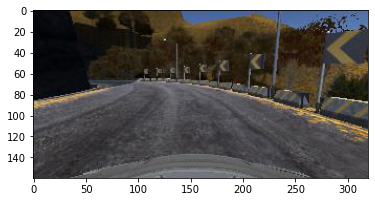

In [25]:
# original
i = img.imread('Data/IMG/center_2022_05_24_15_55_08_928.jpg')
plt.imshow(i)
plt.show()

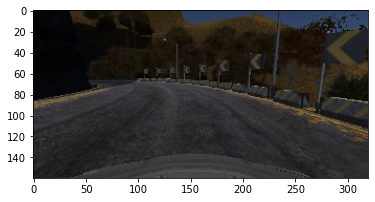

In [26]:
# After augmented - each time we run this, it gives different images
res, st = augmentImage('Data/IMG/center_2022_05_24_15_55_08_928.jpg', -0.313841)
plt.imshow(res)
plt.show()

### Preprocessing

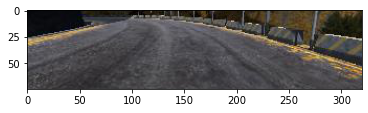

In [27]:
#crop
i = img.imread('Data/IMG/center_2022_05_24_15_55_08_928.jpg')
i = i[60:135,:,:]
plt.imshow(i)
plt.show()

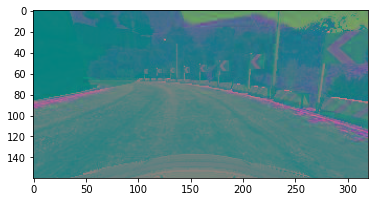

In [28]:
#colour convert
i = img.imread('Data/IMG/center_2022_05_24_15_55_08_928.jpg')
i = cv2.cvtColor(i, cv2.COLOR_RGB2YUV) # to clearly identify lane borders 
plt.imshow(i)
plt.show()

In [29]:
def preprocessImg(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    
    return img

In [30]:
img.imread('Data/IMG/center_2022_05_24_15_55_08_928.jpg')

array([[[ 10,  11,  15],
        [ 10,  11,  15],
        [  9,  10,  14],
        ...,
        [ 81, 110, 166],
        [ 83, 111, 158],
        [ 84, 112, 152]],

       [[ 11,  12,  16],
        [ 10,  11,  15],
        [ 10,  11,  15],
        ...,
        [ 83, 109, 166],
        [ 84, 111, 158],
        [ 84, 112, 152]],

       [[ 11,  12,  16],
        [ 11,  12,  16],
        [ 11,  12,  16],
        ...,
        [ 85, 110, 164],
        [ 85, 112, 157],
        [ 87, 112, 152]],

       ...,

       [[ 54,  52,  55],
        [ 52,  50,  53],
        [ 54,  52,  55],
        ...,
        [ 70,  68,  71],
        [ 70,  68,  71],
        [ 72,  70,  73]],

       [[ 55,  53,  56],
        [ 52,  50,  53],
        [ 52,  50,  53],
        ...,
        [ 74,  72,  75],
        [ 67,  65,  68],
        [ 63,  61,  64]],

       [[ 57,  55,  58],
        [ 51,  49,  52],
        [ 48,  46,  49],
        ...,
        [ 74,  72,  75],
        [ 76,  74,  77],
        [ 79,  77,  80]]

In [31]:
i = preprocessImg(img.imread('Data/IMG/center_2022_05_24_15_55_08_928.jpg'))
i

array([[[0.02352941, 0.50980392, 0.49803922],
        [0.02352941, 0.50980392, 0.49803922],
        [0.02745098, 0.50980392, 0.49803922],
        ...,
        [0.28235294, 0.43137255, 0.56078431],
        [0.25882353, 0.43529412, 0.55294118],
        [0.23137255, 0.43921569, 0.54509804]],

       [[0.02352941, 0.50980392, 0.49803922],
        [0.02745098, 0.50980392, 0.49803922],
        [0.02745098, 0.50980392, 0.49803922],
        ...,
        [0.27058824, 0.44313725, 0.55294118],
        [0.22745098, 0.44313725, 0.54117647],
        [0.20392157, 0.44313725, 0.53333333]],

       [[0.02745098, 0.50980392, 0.49803922],
        [0.03137255, 0.50980392, 0.49803922],
        [0.03529412, 0.50980392, 0.49803922],
        ...,
        [0.24705882, 0.45490196, 0.54509804],
        [0.19215686, 0.45490196, 0.52941176],
        [0.18431373, 0.45490196, 0.5254902 ]],

       ...,

       [[0.29411765, 0.50588235, 0.50588235],
        [0.28235294, 0.50588235, 0.50588235],
        [0.28627451, 0

In [32]:
i.shape

(66, 200, 3)

In [33]:
# input data to the model as batches
import random

def batchGenerator(imagesPath, steeringList, batchSize, trainFlag): #trainFlag -> bcz we dont augment test images
    while True:
        imgBatch = []
        steeringBatch = []

        for i in range(batchSize):
            index = random.randint(0, len(imagesPath) - 1)
            if trainFlag:
                image, steering = augmentImage(imagesPath[index], steeringList[index])
            else:
                image = img.imread(imagesPath[index])
                steering = steeringList[index]
            image = preprocessImg(image)
            imgBatch.append(image)
            steeringBatch.append(steering)
        yield (np.asarray(imgBatch),np.asarray(steeringBatch))

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam

# MODEL
model = Sequential()
model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='elu'))
model.add(Conv2D(filters=36, kernel_size=(5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(filters=48, kernel_size=(5, 5), strides=(2, 2), activation='elu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='elu'))

model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [35]:
# test data used to validate
X_val = X_test
y_val = y_test

In [36]:
history = model.fit(batchGenerator(X_train, y_train, 100, 1), steps_per_epoch=15, epochs=10,
                                  validation_data=batchGenerator(X_val, y_val, 100, 0), validation_steps=15)

Epoch 1/10
15/15 [==============================] - 34s 2s/step - loss: 0.2438 - val_loss: 0.2094
Epoch 2/10
15/15 [==============================] - 18s 1s/step - loss: 0.2096 - val_loss: 0.1970
Epoch 3/10
15/15 [==============================] - 14s 959ms/step - loss: 0.1852 - val_loss: 0.1970
Epoch 4/10
15/15 [==============================] - 13s 933ms/step - loss: 0.1868 - val_loss: 0.1753
Epoch 5/10
15/15 [==============================] - 13s 876ms/step - loss: 0.1796 - val_loss: 0.1799
Epoch 6/10
15/15 [==============================] - 12s 868ms/step - loss: 0.1747 - val_loss: 0.1777
Epoch 7/10
15/15 [==============================] - 13s 872ms/step - loss: 0.1764 - val_loss: 0.1596
Epoch 8/10
15/15 [==============================] - 13s 903ms/step - loss: 0.1574 - val_loss: 0.1610
Epoch 9/10
15/15 [==============================] - 14s 992ms/step - loss: 0.1779 - val_loss: 0.1596
Epoch 10/10
15/15 [==============================] - 13s 938ms/step - loss: 0.1718 - val_loss: 0.

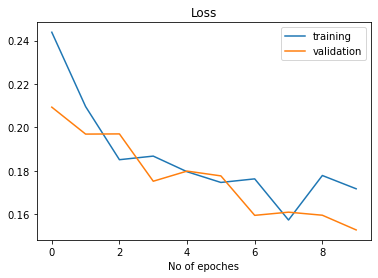

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('No of epoches')
plt.show()

In [39]:
model.save('model.h5')